# Project Computational Biology, January 2020

#### Names:
  - Laura Homs Pérez
  - İlkem Kumru

## Question 1

Write a function that takes the following arguments
  * a list of DNA sequences,
  * a minimum molecular weight,
  * a maximum molecular weight.
  
The function returns `True` if the molecular weight of the DNA sequences in the list is between the given minimum and maximum weight.

In [1]:
from Bio import SeqUtils
from Bio.SeqUtils import molecular_weight

sequences=['AGGTACC', 'ATTAC', 'GATA', 'AATT'] # This is a list with items.

def min_max_mol_weight(sequences, min_weight, max_weight):
    total_weight=0                # defining empty counter. NOT A COUNTER, couner goes 1,2,3,4... -- VARIABLE                              
    for sequence in sequences:    # for loop will read my list of sequences (each sequence one by one). 
        # in the first cycle, total weight, starts with being 0, 
        # and then, the molecular weight of the first item i calculated and added to the total weight.
        
        # In the second cycle, the total weight starts being witht he weight of the first item.
        # and then, the molecular weight of the second item is calculated and added to the total weight.
        
        # In the third cycle, the total weight starts being with the weight of the: first + second items.
        # and then, the molecular weight of the third item is calculated and added to the total weight.
        
        # Until it reaches the last item, the forth one in this case, so number 3.
        
        
         total_weight= total_weight+molecular_weight(sequence)
     
    
    if total_weight> (min_weight) and total_weight < (max_weight): # so if the total molecular weight is smaller or 
        # equal than min weight, the program won't even go to the second part of the if statement, it will return directly False.
        
        
        # And then, chechks the total_weight against the min and max weight. And returns  either true or false.
         return True
    else:
        return False

In [4]:
min_max_mol_weight(sequences, 1000, 10000)   ## function that returns True when sequences are between min and max weight. 

True

In [40]:
### Now, I want to take into consideration illegal characters. Actually is not working.. It does not work for a list of items, 
### but only for a string. 
from Bio import SeqUtils
from Bio.SeqUtils import molecular_weight

sequences=("CdTACGAT", "CGTGCGTAAG", "CGTACGATGAC") # This is a tupple. Should be a list. A tupple element cannot be modified 
# once assigned to the list. 

def min_max_mol_weight_2(sequences, min_weight, max_weight):
    total_weight=0                                   
    for sequence in sequences:
        
        for characters in sequence: # this does not work because python is expecting a list (on the right side and a string in
                # the left side, but I am giving him a string on the right side.  
                    # I would solve this by googling how to read each character in a string separatey.
           # print (characters)
            if characters not in 'ACGT':
              #  if 1==1:
                print ("Error: there are illegal characters in the DNA sequence")
                return None # if it gets to return statement, the program is inturrupted and it won't continue.
            else:  
                continue
    total_weight= total_weight+molecular_weight(sequence) # I had this for loop inseide  the for loop that was checking
    # for illegal characters! That is why it didn't work.
    if total_weight> (min_weight) and total_weight < (max_weight): # I made a mistake by putting the if statement inide the for 
        # loop, where it was reading only one sequence from the list and returning True or False. 
        return True # Return means end of the function.
    else:
        return False
               
                
min_max_mol_weight_2(sequences, 1000, 10000)

# I enter tho the first for loop only once, which will have three cycles because there are three items in my ist. 
# In each cycle I enter the second for loop (characters in sequences), which means, I'll enterr to this for loop
# three times in total. 
# In the second loop, the first time I enter the loop, how many cycles will it have? 7--> CTACGAT. 
# When the second for loop finishes to read all 7 characters, it will it exit it and will go to the second cycle
# of the first loop (CGTGCGTAAG). 


True

In [28]:
min_max_mol_weight_2(sequences, 1000, 10000)

'here'

## Question 2

Write a function that takes the following arguments
* the name of a FASTA file that contains DNA sequences,
* a minimum molecular weight,
* a maximum molecular weight.

The functions returns a list of DNA sequences such that the total molecular weight of the sequences in the list is between the minimum and maximum specified molecular weight.

Note: the list does not necessarily contain all the DNA sequences in the FASTA file.

In [69]:
### This is for Question number 2, but using code from Question number 3. The only thing that changes
### is a break in the foor loop of the function "all possibilities", so it only returns one possibility when it finds it. 
### It will go through all combinations of sequences, until it find one. 

from Bio import SeqUtils
import itertools
from Bio.SeqUtils import molecular_weight          

def mol_weight(x, min_weight, max_weight, sequences):

    for item_in_list in itertools.combinations(sequences,x): # itertools has two arguments: Sequences, in which is going to
        # iterate, and x, in this case, the number of combinations that will do, which is going to be the lenght of the 
        # sequence. 
        
        sequences_weight=list(map(molecular_weight,item_in_list))  # Every item_in_list are each string from the combinations.
        # So, combinations of 1 will have 1 item in the list and we want its molecular weight. 
        # Combinations of two, will have two items in the list, and we want to sum up the molecular weight of each one.
        # For that, we use map, which we used in class, and allows us to go calculate the molecular weight of each item_in_list
        # Map will return an iterator of the molecular weights of each item_in_list.
        # We make this what map return a list, called sequences_weight.
        
        weight_sequence=sum(sequences_weight) # Sum up molecular weight of sequences, within each possibility:
        # so all possibilities of 1, all possibilities of two combinations of sequences, all posibilities of tree, etc.
        # there will be, hence, a molecular weight of each possibility after we sum it up.
        
        if  weight_sequence > min_weight and  weight_sequence < max_weight: # Does it fit in our range?
            print (item_in_list, weight_sequence)
            print ("\n _________") # This is just to print a line after the program has print a sequence.
            
            return "Stop"    # Return "Stop" once it finds one sequence or combination on sequences that fit.
        # it exits the function and return the value stop. It will back to where it was called from, in this case
        # all posibilities.
        else:
           # print("Skipping because molecular weight is not between the min and max weight:", weight_sequence)  
           # You can also print the line above to see the iteration.
            continue
            
            # the only differece from question number 3 when it find a combination or combinations (item_in_list) or sequences
            # that fits in the range. 
            
        # return "notstop"  # this is how it should be. So the function has two possible returns. one that goes to the if 
        # statement in the "allpossiilities" function, and the other one that only returns "nontop", meaning, it haven't found
        # any fit
            
#######################################################################
def all_possibilities(sequences, min_weight, max_weight):
    # ifitstrue="notstop"
    # For every sequence in sequences...
    for i in range (1, 1+len(sequences)): # All sequences is a list created in "get_sequences" function. 
        # Range returns values from the first number of the range till the last-1.
        # So, in this case, we want a for loop that will go through all combinations from combination 1 to the last one, which is
        # the length of the sequence +1. To count number of combinations.
        # Call this
        print("Combinations of",i)  # The output will be: Combinations of 1,
        # Combinations of 2, etc.
        
        ifitstrue = mol_weight(i,min_weight, max_weight, sequences)  # it calls mol_weight function, first with combinations of 1
        # it will "jump" to that function, will go through all the cycles having 1 possibility (if we have 10 sequeces, then 10 
        # cycles) and it will come back here and go to the if statement down below. 
        
        # ifitstrue, in the first cycle of the first loop, is nothing. or, we coyld have set "ifitstrue to "notstop".
        # we call mol_weight
         
        if (ifitstrue == "Stop"): # If the mol_weight return True, it means it found the sequence, then stops everything. 
        # if (mol_weight(i,min_weight, max_weight, sequences) == "Stop")   # that would have been the same. we would 
        # have saved the "ifitstrue" step.
            break # We are breaking the loop to find only one that fits. 
        else:
            continue
            
            # if the program does not find any combination or combinations of sequences that fits, it will continue
            # until the end and return nothing. 
        

#######################################################################
# This function: opens the file, reads the file and skips the > lines, puts all other lines in a list
def get_sequences(name_file, min_weight, max_weight):

    # Reading the file
    file=open(name_file, "r")
    sequences=list()
    
    # Putting file contents in sequences, but skipping the >
    for line in file:
        if line.startswith('>'):
            continue   # So.. do nothing and continue
        else:
            sequences.append(line.rstrip()) # We are putting all lines in the list "sequences"
            # rsrip removes white spaces at the end of the string
            
    all_possibilities(sequences, min_weight, max_weight)         
    
    # Calling the function which will print all the sequences that fit the criteria.
    #return sequences
    
    
    
#######################################################################
# Calling the main function that answers Question number 2


get_sequences ('FASTA_FILE', 300, 10000)
#min_weight=30000
#max_weight=50000
#sequences=get_sequences('FASTA_FILE',min_weight,max_weight)
#all_possibilities(sequences, min_weight, max_weight)




        





Combinations of 1
('ACGTGACGTGCGCGTTTACGTACGTA',) 8082.138199999999

 _________


## Question 3

Write a function that takes the following arguments
* the name of a FASTA file that contains DNA sequences,
* a minimum molecular weight,
* a maximum molecular weight.

The functions returns all lists of DNA sequences such that the total molecular weight of the sequences in the list is between the minimum and maximum specified molecular weight.

In [70]:
from Bio import SeqUtils
import itertools
from Bio.SeqUtils import molecular_weight   

#######################################################################
# This function calculates the molecular weight for each sequence in tha Fasta file. Then it will print only those sequences
# that fit between the min and the maximum weight. 

def mol_weight(x, min_weight, max_weight, sequences): # x is i from "all_possibilities"

    for item_in_list in itertools.combinations(sequences,x): # how many cycles? First cycle of the first loop
        # of all_possibilities, will do the for loop of mol weight (itertools.combinations) 10 times, if I had 10 sequences.
        # Then it will go back to "all_possibilities", where I will be 2, and so X, and will make the for loop of "mol_weight"
        # In the second cycle of "all_possibilities", how many cycles will I have in "mol_weight"?  10nCr2= 45
        # The last cycle of "all_possibilities", in this case 10nCr10, there will be only 1 cycle in "mol_weight". 
        # C = combinations. nCr = 10C2 means, we have 10 people, how many different dance partners can we have?
        
        sequences_weight=list(map(molecular_weight,item_in_list)) # this has been done hundreds of times, because there are 
        # hundreds of cycles in the for loop of "mol_weight".
        # My item_in_list is a list of possible combinations. (1, 2, 3...)
        # Map is trasforming my list of combinations of sequences to  list of molecular weights. 
        # It makes a new list like that --> [8082.138199999999, 8836.5976, 18.0153]
        
        weight_sequence=sum(sequences_weight)
        if weight_sequence > min_weight and weight_sequence < max_weight:  
            
            print (item_in_list, weight_sequence) #  it prints as many times as many cycles as cycles in the the for loop of
            # "mol_weight" there are. If we would have put a RETURN instead, if would have just return 1 possibility
            # and exit the funtion.
            print ("\n _________")
        else:
            print("There are no sequences that fit between the minimum and the maximum range")
            continue
            
            # WHY DON'T MY FUNCTION HAVE ANY OUTPUT? Because I decided that I wanted to put the results on the console during 
            # execution, not at the end. It is easier like this.8'56 
            
#######################################################################
# This function gives all possibilities

def all_possibilities(sequences, min_weight, max_weight):
    for i in range (1, 1+len(sequences)):  # How many cycles? As many as the lenght of the list of sequences. Maybe 10.
        # it will call the function mol_weight maybe 10 times. 
        # "i" is each sequence, of my list of sequences. i is the number of 1, 2, 3, 4, 5, 6, 7.... Is "r" in computation.
        # I could just put the for loop from mol_weight inside here and have a for loop in a for loop. 
        mol_weight(i,min_weight, max_weight, sequences)
        
#######################################################################        
# This function opens the file, reads it and skips lines staring with ">". Then, puts all other lines in a list called sequences.
def main_function(name_file, min_weight, max_weight):

    # Reading the file
    file=open(name_file, "r")
    sequences=list()
    
    # Putting file content in the list "sequences", while skipping lines starting with ">".
    for line in file:
        if line.startswith('>'):
            continue  # skipping the line, other wise it will go to else.
        else:
            sequences.append(line.rstrip())
    
    # Calling the function which will print all the sequences that fit the criteria.
    all_possibilities(sequences, min_weight, max_weight)
    
#######################################################################  
# Calling the main function that answers Question number 3

main_function('FASTA_FILE',1,200000)

('ACGTGACGTGCGCGTTTACGTACGTA',) 8082.138199999999

 _________
('ACGGTGGGTCGACGTGA',) 5371.406999999999

 _________
('ACGTGTGAGCGTGGGGTCGGATTGCGAT',) 8836.5976

 _________
('ACCCGGATGCAGTGCAGCAAATGC',) 7451.754300000001

 _________
('CGTGCAAGGCTGTGC',) 4688.970499999999

 _________
('',) 18.0153

 _________
('ACGTGACGTGCGCGTTTACGTACGTA', 'ACGGTGGGTCGACGTGA') 13453.545199999999

 _________
('ACGTGACGTGCGCGTTTACGTACGTA', 'ACGTGTGAGCGTGGGGTCGGATTGCGAT') 16918.7358

 _________
('ACGTGACGTGCGCGTTTACGTACGTA', 'ACCCGGATGCAGTGCAGCAAATGC') 15533.892500000002

 _________
('ACGTGACGTGCGCGTTTACGTACGTA', 'CGTGCAAGGCTGTGC') 12771.108699999999

 _________
('ACGTGACGTGCGCGTTTACGTACGTA', '') 8100.153499999999

 _________
('ACGGTGGGTCGACGTGA', 'ACGTGTGAGCGTGGGGTCGGATTGCGAT') 14208.004599999998

 _________
('ACGGTGGGTCGACGTGA', 'ACCCGGATGCAGTGCAGCAAATGC') 12823.1613

 _________
('ACGGTGGGTCGACGTGA', 'CGTGCAAGGCTGTGC') 10060.377499999999

 _________
('ACGGTGGGTCGACGTGA', '') 5389.422299999999

 _________
(

## Question 4

Write a function that takes the name of a FASTA file with amino acid sequences as an argument, reads the sequences, and returns a matrix that describes the probability of an amino acid, given the preceding amino acid.

A second function takes the following arguments
* a matrix as an argument, and
* an integer that represents a length.

It generates a random sequence using the given transition probabilities in the given matrix and of the specified length.

In [1]:
from Bio.SeqUtils import molecular_weight
from Bio.Alphabet.IUPAC import protein, unambiguous_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import Bio.SeqIO
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### Formula that needs to be implemented for this question (conditional probability): Probability(A|B)= counts (AB)/ counts(A)
### where AB are all the pair of amino acids and A and the single counts of amino acids. 


#### In this part, we generate the data - don't actually need it, for test only
def generate_sequence(min_len, max_len, alphabet):
    length = random.randint(min_len, max_len)
    return Seq(''.join(random.choices(alphabet.letters, k=length)), alphabet=alphabet)

def generate_seq_records(nr_seqs, min_len, max_len, alphabet):
    records = list()
    for i in range(1, nr_seqs + 1):
        seq_id = f'seq_{i:03d}'
        seq = generate_sequence(min_len, max_len, alphabet)
        records.append(SeqRecord(seq, id=seq_id, description=f'fragment {i}'))
    return records
###############################################################################################


##### This function reads the protein FASTA file, 
def reading_protein_file(name_file):
    file=open(name_file, "r")
    sequences=list()
    
    for line in file:
        if line.startswith('>'):
            continue
        else:
            sequences.append(line.rstrip())
            sequences_joined= "".join(sequences) 
        
    return sequences_joined # it returns my protein sequences all joined together in one string 
# and it returns to "one_function" because it called it.
       
###############################################################################################

### Counting the ocurrances of each aminoacid and putting in a dictionary for each aminoa acid. 
def allfrequencies(protein_seq):
    all_freq={}
    for i in protein_seq: # for amino acid in protein sequence... 
        if i in all_freq: # In the first loop, there i=0, because all_freq is empty. So, the first loop will go to else.
            # Now, once allfreq=1, we go back to the loop and keep adding one for each new occurance. 
            # We end up in a dictionary with all the different occurrences encountered and the number of times they occur.
            all_freq[i] += 1   
        else: 
            all_freq[i] = 1   # in the first loop, if we had an A, A:1, and it goes to the second one. 
            # if the second one is also A, then it adds 1. If it's not, it has not appear yet and it will add one to the new
            # amino acid. 
            # "i" is a character, an aminoacid
    return all_freq  # returns a dictionary wit {A:3, B:4, ...}    
           
###############################################################################################
    
### Counting the occurances of combination of two of aminoacids AA, AC, AD, AE... CA, CD...
def alldblfrequencies(protein_seq):
    pair_aminoacids=zip(protein_seq[:-1], protein_seq[1:]) # This is magic and we should not use it, but didn't find other way.
    # [:-1] means, all elements of my list but the last. 
    
   # something=('CGTGGTGCGAGTTGACGTGCGATGCAGTG')
   # print(something[1:]) # All letters except the first one
   # print(something[:-1]) # All letters except the last one
   # list(zip(something[:-1],something[1:]))

#GTGGTGCGAGTTGACGTGCGATGCAGTG
#CGTGGTGCGAGTTGACGTGCGATGCAGT

# Zip is an interator that iterates through the two iterables and aggregates them. Zip returns an interator. To see
# how it works clearly, we can print a list, and see that it would return that:
# [('C', 'G'), ('G', 'T'), ('T', 'G'), ('G', 'G'), ...]
# counts_pairs=Counter(pairs_of_letters)
# print(counts_pairs)
# Counter({('T', 'G'): 6, ('G', 'T'): 5, ('C', 'G'): 4,...})

    
    count_pair_aminoacids=Counter(pair_aminoacids) # If I use Counter in my zip interator, I get the counts of the pairs of 
    # amino acids. 
    return count_pair_aminoacids

###############################################################################################    
    
### Put the data in nice little array (the matrix)
def matrixfunctionone(count_pair_aminoacids):
    big_list=[]   # that is going to be my final matrix
    temporary_list=[]  # my matrix will include 20 lists
   
    for aminoletterLEFT in protein.letters: # making a for loop for the aminoacid on the left from my counter of pairs of 
        # amino acids. 
        # For each amino acid that can exist in a sequence (A, C, D, E...). 
        # For A.. go to the for loop.
        temporary_list=[]
        for aminoletterRIGHT in protein.letters: # making a for loop for amino acids on the right from my counter of pairs of
            # amino acids. 
            # We are working with left is A: AA, AC, AD, AE, etc... When we arrive to all possible combinations with A, we exit 
            # the second for loop and go back to the first one. Where we will have : CA, CC, CD, CE, etc.
            
            temporary_list.append(count_pair_aminoacids[(aminoletterLEFT, aminoletterRIGHT)]) # it takes out the number of times
            # each pair of amino acids appear. 
                                         # count_pair_aminoacids[(A,A)]..6
                                         # count_pair_aminoacids[(A,C)]..0
                                         # count_pair_aminoacids[(A,D)]..1478
                                         # count_pair_aminoacids[(A,E)]..
            
        big_list.append(temporary_list)  # we are appending a list (teporary list) to a list (big_list)--> a matrix
    return big_list
# I think we don't need this function. We get the result from the "matrixfunctiontwo".

###############################################################################################   

### The same matrix as before but dividing between the counts of each amino acid, which comes from the dictionary "all_freq".
def matrixfunctiontwo(count_pair_aminoacids,all_freq):
    big_list=[]
    temporary_list=[]
   
    for aminoletterLEFT in protein.letters:
        temporary_list=[]
        for aminoletterRIGHT in protein.letters:
            tempdata=count_pair_aminoacids[(aminoletterLEFT, aminoletterRIGHT)] / all_freq[aminoletterLEFT]
            #tempdata=round(tempdata,5)  # Round up the results
            temporary_list.append(tempdata)
        big_list.append(temporary_list)
    return big_list

###############################################################################################

### Just playing around
def callall():
    protein_seq = generate_sequence(1000, 1000, protein)
    all_freq=allfrequencies(protein_seq)
    all_dbl_freq=alldblfrequencies(protein_seq)
    nice_matrix1=matrixfunctionone(all_dbl_freq)
    nice_matrix2=matrixfunctiontwo(all_dbl_freq,all_freq)
    return nice_matrix2

###############################################################################################

######### THE FUNCTION THAT ACTUALLy CALLS THE FUNCTIONS
def onefunction(name_file):
    ## GENERATE SEQUENCE - don't need this, was just for testing random
    #protein_seq = generate_sequence(1000, 1000, protein)
    
    ## READ FASTA FILE
    protein_seq = reading_protein_file(name_file) # the return from reading protein file is saved in "protein_seq"

    ## COUNT OCCURANCES IN SEQUENCE
    all_freq=allfrequencies(protein_seq) # one_function calls "allfrequences" and saves the output "all_freq"

    ## COUNT OCCURANCES 2 LETTER IN SEQUENCES
    all_dbl_freq=alldblfrequencies(protein_seq) # when this function is called, the return is saved as "all_dbl_freq"

    ## MAKE A NICE LOOKING MATRIX
    nice_matrix1=matrixfunctionone(all_dbl_freq)

    ## MAKE A NICE LOOKING MATRIX WITH PROPABILITIES
    nice_matrix2=matrixfunctiontwo(all_dbl_freq,all_freq)

    ## PLOT
    #plt.imshow(nice_matrix1)     # occurances
    #plt.imshow(nice_matrix2)      # propabilites

    #print(protein_seq)
    #print(all_freq)
    #print(all_dbl_freq)
   # print(nice_matrix2)
    return(nice_matrix2)


    

###############################################################################################

######### UNIQUE FUNCTION FROM FIRST PART EXERCISE 4
onefunction("proteins.fasta")







[[0.05103969754253308,
  0.058871185525249795,
  0.05076964623278423,
  0.046448825276802594,
  0.0532001080205239,
  0.046448825276802594,
  0.049689440993788817,
  0.04293815825006751,
  0.05698082635700783,
  0.04158790170132325,
  0.054010261949770454,
  0.04725897920604915,
  0.051309748852281935,
  0.04374831217931407,
  0.04914933837429111,
  0.05563056980826357,
  0.052660005401026194,
  0.04428841479881177,
  0.04914933837429111,
  0.054820415879017016],
 [0.0508652333508128,
  0.04981646565285789,
  0.04562139486103828,
  0.048505506030414265,
  0.04457262716308338,
  0.053224960671211324,
  0.05217619297325642,
  0.050340849501835344,
  0.04902988987939171,
  0.0529627687467226,
  0.04981646565285789,
  0.0437860513896172,
  0.05007865757734662,
  0.04693235448348191,
  0.05007865757734662,
  0.05217619297325642,
  0.05060304142632407,
  0.04929208180388044,
  0.05427372836916623,
  0.05584687991609858],
 [0.04235677436872115,
  0.05511811023622047,
  0.040727667662231876,
 

In [4]:
###############################################################################################

######### SECOND PART OF EXERCISE 2
import itertools
import numpy

matrix_prob=onefunction("proteins.fasta") ## Returns the probability matrix from before
#lenght=22
def aminoacid_sequences_from_probabilities(matrix_prob, length):
 #   lenght=22
    list_letters=list(protein.letters)   # making a list of all possible amino acids
    
    pair_aa=[''. join(i) for i in itertools.product(list_letters, repeat=2)]  # making a list of combinations of two amin oacids. 
    # pair_aa is a list of all possible combinations of amino acids --> ['AA', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', etc..]
    #  Itertools products does this: product('ABCD', repeat=2) --> AA AB AC AD BA BB BC BD CA CB CC CD DA DB DC DD
    # "i" is each pair of amino acids. 
    #print (pair_aa)
    x=matrix_prob  # this is my matrix of probabilities from first part of exercise 4. I just renamed my variable
    y=numpy.hstack(x)  # I am making a list of my matrix, so I can use it as an argument in random.choices
    # I need to split my matrix into  a big list of 400 probabilities. 
    # Numphy funcion basically stacks my list of list into a big list. 
    aminoacids_random=random.choices(pair_aa, weights=y, k=length) # random.choices will put in a list pairs of aminoacids based
    # on the weights. The problem, I don't know how not to let define the arguemnt "k" only in my function. because it doesn't work.
    joined_aminoacids_random=''.join(aminoacids_random) # join amino acids into a string. 
    return joined_aminoacids_random
    
#aminoacid_sequences_from_probabilities(matrix_prob, length=22 ) 

#print(matrix_prob)



# I knew I need to return the output of random choices in a list. Random.choices takes 3 arguments: 


print("ANSWER FROM EXERCISE 4.2")

aminoacid_sequences_from_probabilities(matrix_prob, length=22)

ANSWER FROM EXERCISE 4.2


'NKFRMELGVWTNEVCWLAVLTFTHNYMYLALCTFGNHSGHTVWP'

## Question 5

Write a function that takes a probability matrix as defined in the previous question, and visualizes it as a heatmap.  The axis of the plot should be appropriately labeled with the three-letter acronyms of the amino acids.

In [79]:
import matplotlib.pyplot as plt
import numpy as np

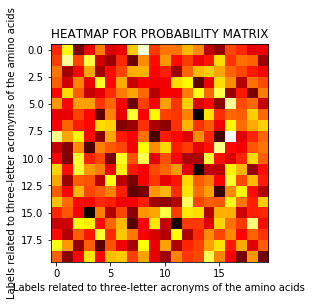

In [120]:
def heatmap(a):
 
    plt.imshow( a , cmap='hot' , interpolation = 'nearest' )
    plt.title( 'HEATMAP FOR PROBABILITY MATRIX' )
    plt.xlabel( 'Labels related to three-letter acronyms of the amino acids' )
    plt.ylabel( 'Labels related to three-letter acronyms of the amino acids' )
    plt.show()
    
heatmap(onefunction("proteins.fasta"))    
    
    